In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score,classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [83]:
path_in = "twitterClimateData.csv"
df = pd.read_csv(path_in, delimiter=";")
df = df.sample(10000)
df = df[pd.notnull(df["text"])]

In [84]:
df = df[["search_hashtags", "text"]]
df["category_id"] = df["search_hashtags"].factorize()[0]
category_id_df = (
    df[["search_hashtags", "category_id"]].drop_duplicates().sort_values("category_id")
)
df.head()

,search_hashtags,text,category_id
32405,#fridaysforfuture,It’s 2 hours until this #ClimateStrike in NYC ...,0
33684,#globalwarming,I'm optimistic about our future because young ...,1
57120,#climatestrike,With the @nswnma contingent at the Sydney #Cli...,2
48467,#climatechange,Southern Europe will be most affected by #Clim...,3
31366,#climateaction,PS90K Climate Change Expo performance!!! @90pr...,4


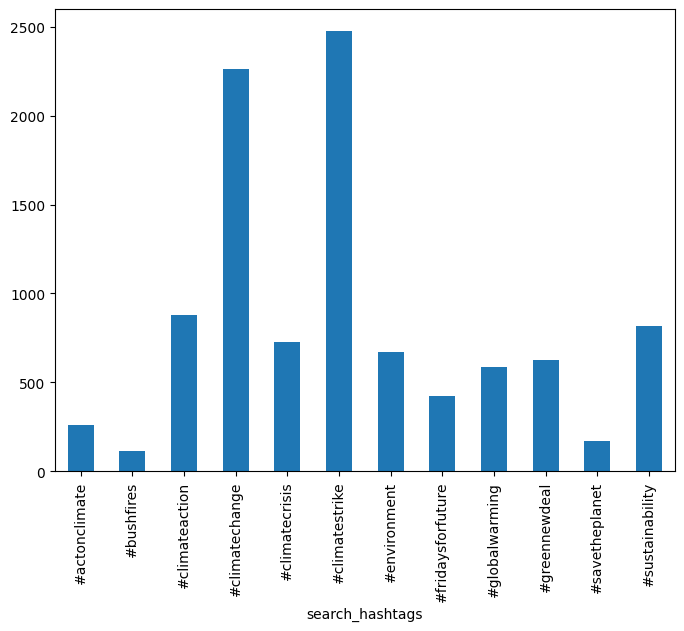

In [85]:
fig = plt.figure(figsize=(8, 6))
df.groupby("search_hashtags").text.count().plot.bar(ylim=0)
plt.show()

In [86]:
df.groupby("search_hashtags").text.count()

search_hashtags
#actonclimate         259
#bushfires            112
#climateaction        879
#climatechange       2264
#climatecrisis        725
#climatestrike       2477
#environment          671
#fridaysforfuture     421
#globalwarming        584
#greennewdeal         624
#savetheplanet        170
#sustainability       814
Name: text, dtype: int64

In [87]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm="l2",
    encoding="latin-1",
    ngram_range=(1, 2),
    stop_words="english",
)
features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id
features.shape

(10000, 6125)

In [88]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['text'])

In [89]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, df["search_hashtags"], random_state = 0)
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Model validation

In [91]:
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(classification_report(y_test, y_pred))

Accuracy: 0.4272
F1 score: 0.142562722625564
                   precision    recall  f1-score   support

    #actonclimate       0.00      0.00      0.00        59
       #bushfires       0.00      0.00      0.00        34
   #climateaction       1.00      0.02      0.05       208
   #climatechange       0.36      0.75      0.49       556
   #climatecrisis       1.00      0.02      0.03       189
   #climatestrike       0.46      0.94      0.62       629
     #environment       0.87      0.08      0.15       164
#fridaysforfuture       0.00      0.00      0.00       104
   #globalwarming       1.00      0.03      0.06       137
    #greennewdeal       1.00      0.06      0.11       164
   #savetheplanet       0.00      0.00      0.00        50
  #sustainability       1.00      0.12      0.21       206

         accuracy                           0.43      2500
        macro avg       0.56      0.17      0.14      2500
     weighted avg       0.61      0.43      0.31      2500



/home/david/.local/share/virtualenvs/Trabajo2_almdatos-LZAGjvTA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/share/virtualenvs/Trabajo2_almdatos-LZAGjvTA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/share/virtualenvs/Trabajo2_almdatos-LZAGjvTA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi